<h1><b><i>Ο αλγόριθμος Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>)</b></h1>

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο της <i>Προσομοιωμένης Ανόπτησης</i> (<i>Simulated Annealing</i>), περισσότερες πληροφορίες για τον οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Simulated_annealing">εδώ</a>.Θα χρησιμοποιήσετε τα <b>δύο έτοιμα</b> προγράμματα που δίνονται στη συνέχεια. Τα προγράμματα αυτά επιλύουν το πρόβλημα του <i>Περιπλανώμενου Πωλητή</i> (<i>Travelling Salesman Problem</i>, <i>TSP</i>), περισσότερες πληροφορίες για το οποίο μπορείτε να βρείτε <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">εδώ</a>. Το πρώτο πρόγραμμα επιλύει το πρόβλημα <i>TSP</i> χρησιμοποιώντας τον αλγόριθμο <i>Simulated Annealing</i> και το δεύτερο επιλύει το ίδιο πρόβλημα, χρησιμοποιώντας τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/Hill_climbing"><i>Hill Climbing</i></a>. Η επίλυση του προβλήματος γίνεται για <b>50 πόλεις</b>.

<b>Σημείωση:</b> Βεβαιωθείτε ότι το <b><i>Runtime Environment</i></b> είναι για <b><i>Python 2</i></b>.

https://ai.stackexchange.com/questions/8983/how-is-simulated-annealing-better-than-hill-climbing-methods

<h2><b><i>Simulated Annealing</i></b></h2>

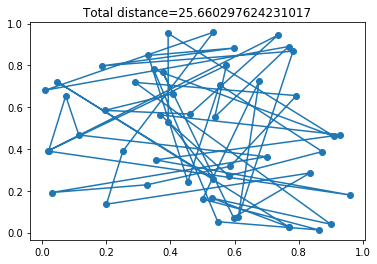

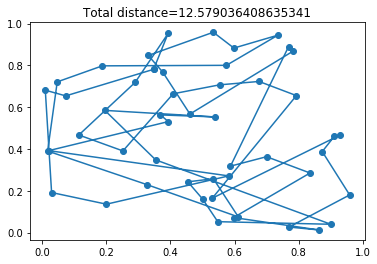

T=   0.20000 , distance=   12.57904 , accepted steps= 501


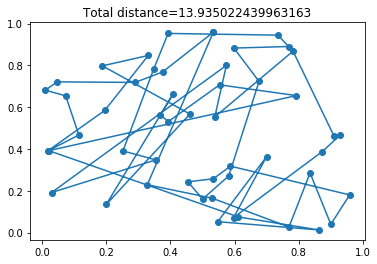

T=   0.18000 , distance=   13.93502 , accepted steps= 501


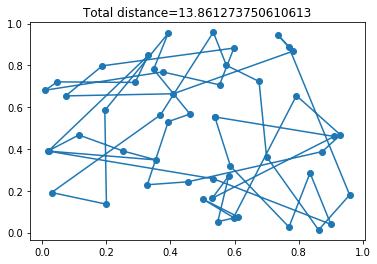

T=   0.16200 , distance=   13.86127 , accepted steps= 501


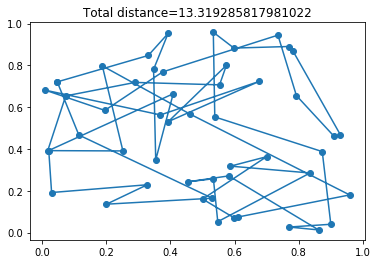

T=   0.14580 , distance=   13.31929 , accepted steps= 501


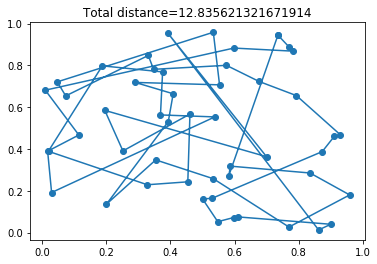

T=   0.13122 , distance=   12.83562 , accepted steps= 501


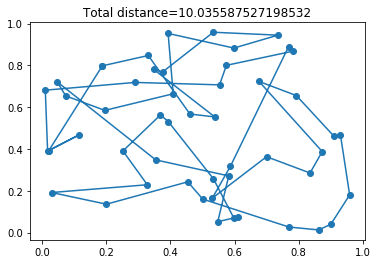

T=   0.11810 , distance=   10.03559 , accepted steps= 501


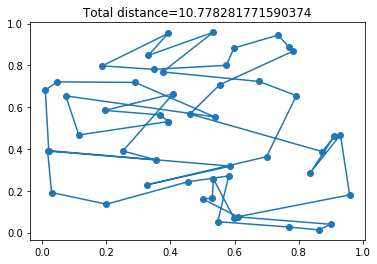

T=   0.10629 , distance=   10.77828 , accepted steps= 434


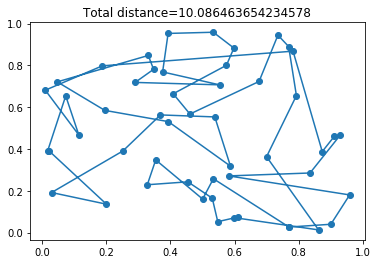

T=   0.09566 , distance=   10.08646 , accepted steps= 365


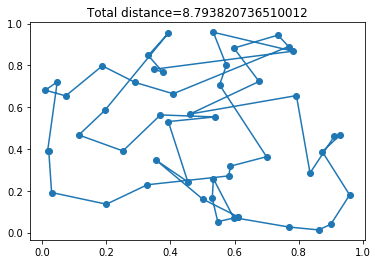

T=   0.08609 , distance=    8.79382 , accepted steps= 276


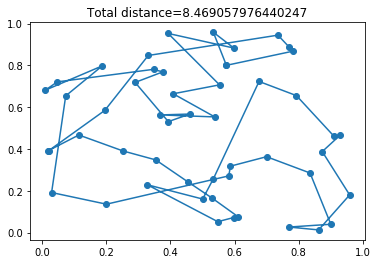

T=   0.07748 , distance=    8.46906 , accepted steps= 221


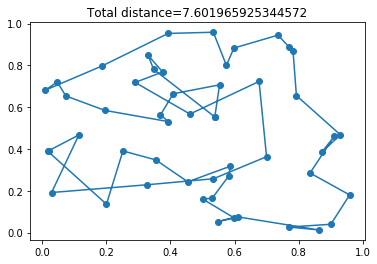

T=   0.06974 , distance=    7.60197 , accepted steps= 189


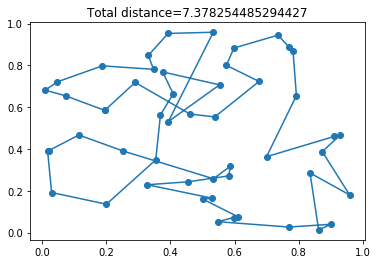

T=   0.06276 , distance=    7.37825 , accepted steps= 152


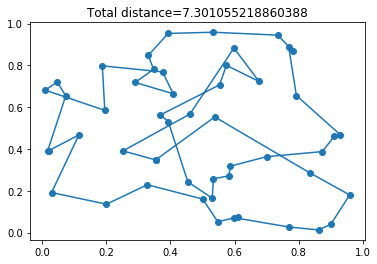

T=   0.05649 , distance=    7.30106 , accepted steps= 141


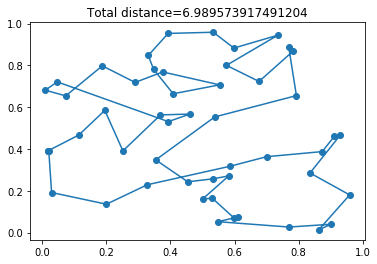

T=   0.05084 , distance=    6.98957 , accepted steps= 89


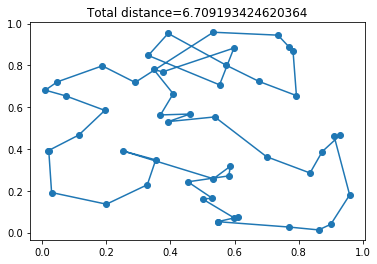

T=   0.04575 , distance=    6.70919 , accepted steps= 115


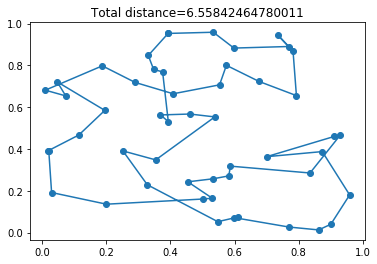

T=   0.04118 , distance=    6.55842 , accepted steps= 70


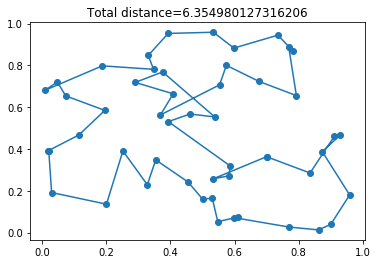

T=   0.03706 , distance=    6.35498 , accepted steps= 46


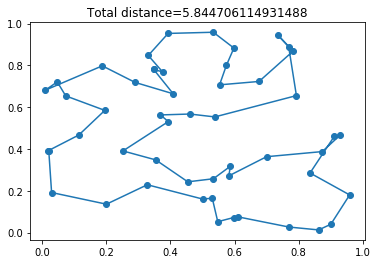

T=   0.03335 , distance=    5.84471 , accepted steps= 52


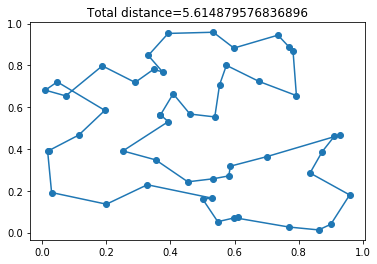

T=   0.03002 , distance=    5.61488 , accepted steps= 27


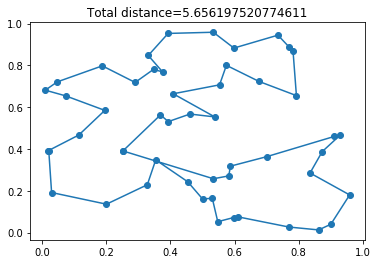

T=   0.02702 , distance=    5.65620 , accepted steps= 31


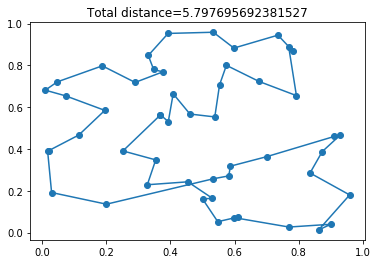

T=   0.02432 , distance=    5.79770 , accepted steps= 18


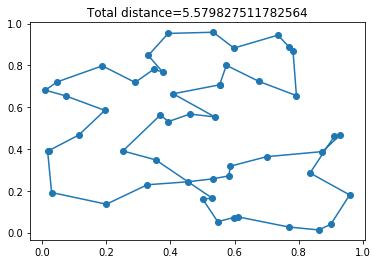

T=   0.02188 , distance=    5.57983 , accepted steps= 19


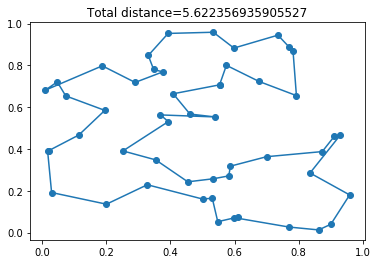

T=   0.01970 , distance=    5.62236 , accepted steps= 14


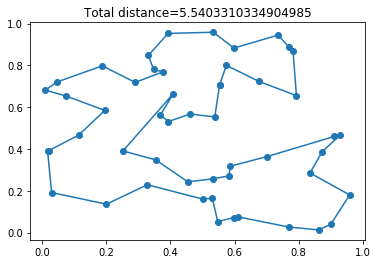

T=   0.01773 , distance=    5.54033 , accepted steps= 12


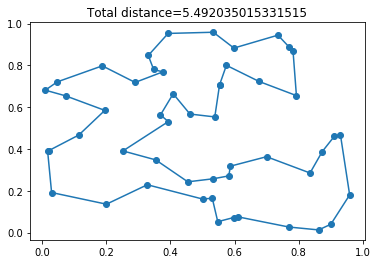

T=   0.01595 , distance=    5.49204 , accepted steps= 7


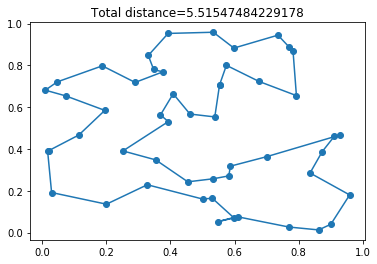

T=   0.01436 , distance=    5.51547 , accepted steps= 8


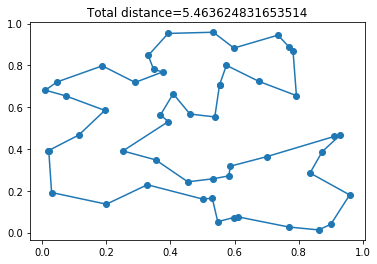

T=   0.01292 , distance=    5.46362 , accepted steps= 7


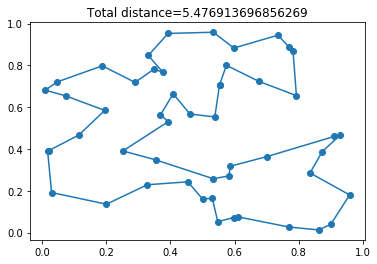

T=   0.01163 , distance=    5.47691 , accepted steps= 6


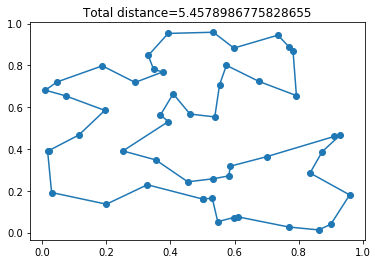

T=   0.01047 , distance=    5.45790 , accepted steps= 8


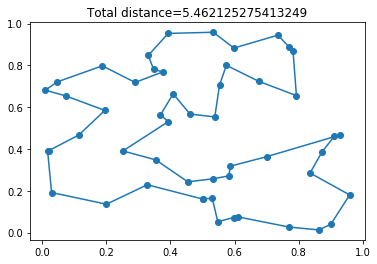

T=   0.00942 , distance=    5.46213 , accepted steps= 3


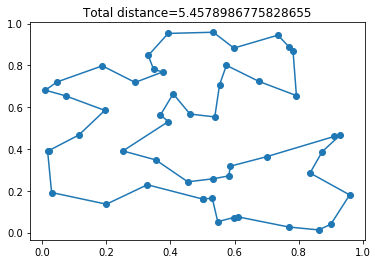

T=   0.00848 , distance=    5.45790 , accepted steps= 5


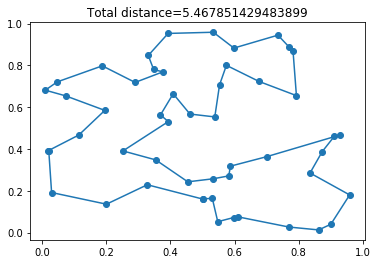

T=   0.00763 , distance=    5.46785 , accepted steps= 6


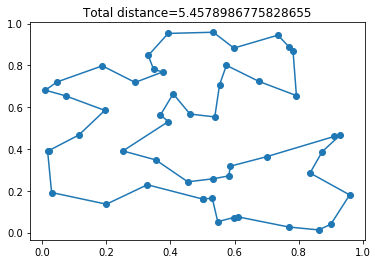

T=   0.00687 , distance=    5.45790 , accepted steps= 2


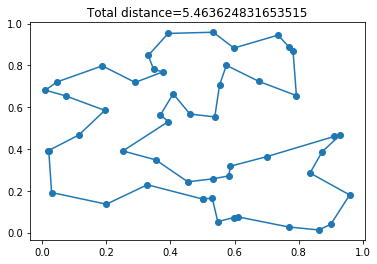

T=   0.00618 , distance=    5.46362 , accepted steps= 5


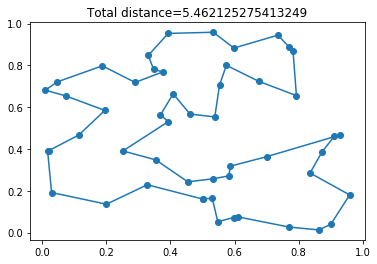

T=   0.00556 , distance=    5.46213 , accepted steps= 2


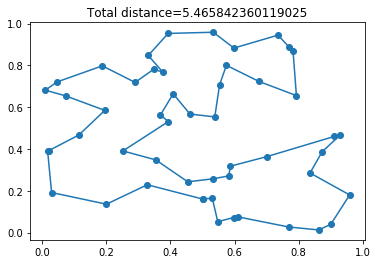

T=   0.00501 , distance=    5.46584 , accepted steps= 6


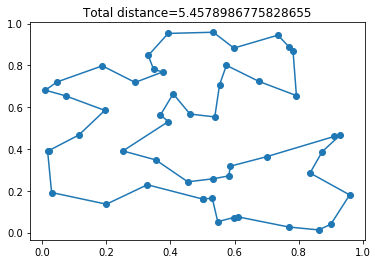

T=   0.00451 , distance=    5.45790 , accepted steps= 3


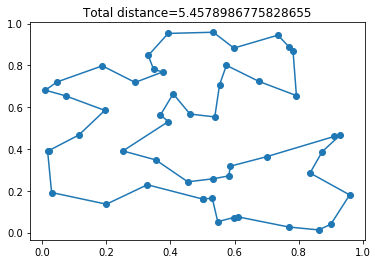

T=   0.00406 , distance=    5.45790 , accepted steps= 0


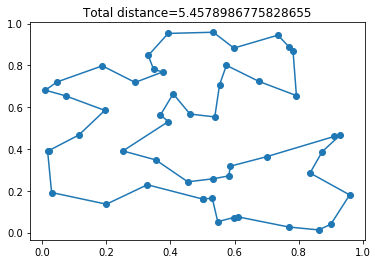

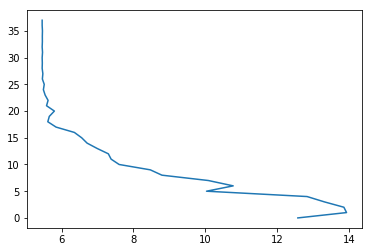

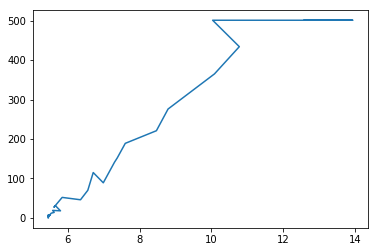

In [3]:
#!/usr/bin/env python
steplist = []
distlist = []
totalsteplist = []
""" Traveling salesman problem solved using Simulated Annealing.
http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/salesman.py
"""
from scipy import *
from pylab import *

def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(nn):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap
    
    
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

if __name__=='__main__':

    ncity = 50       # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [rand(),rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    Plot(city, R, dist)
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])
                
                if de<0 or exp(-de/T)>rand(): # Metropolis
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
        distlist.append(dist)
        steplist.append(accepted)
        print "T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted)
        totalsteplist.append(t)
        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop

        
    Plot(city, R, dist)
plot(distlist,totalsteplist)
show()
plot(distlist,steplist)
show()

<h2><b><i>Hill Climbing</i></b></h2>

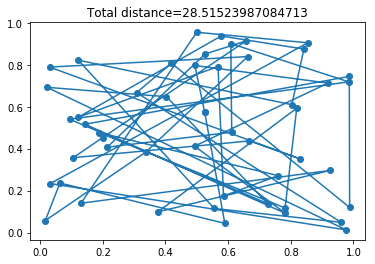

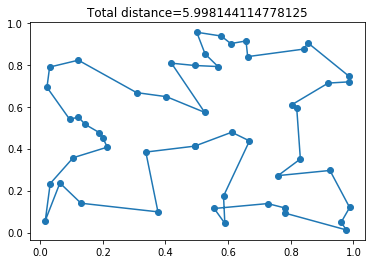

T=   0.20000 , distance=    5.99814 , accepted steps= 114


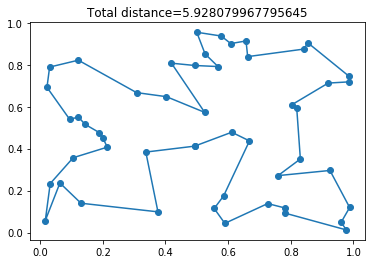

T=   0.18000 , distance=    5.92808 , accepted steps= 1


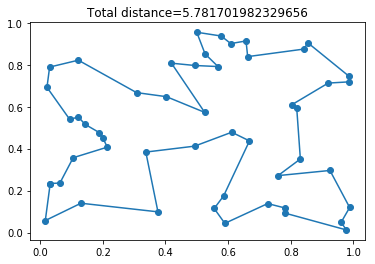

T=   0.16200 , distance=    5.78170 , accepted steps= 1


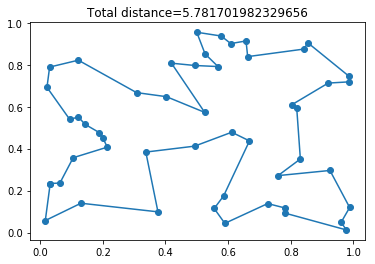

T=   0.14580 , distance=    5.78170 , accepted steps= 0


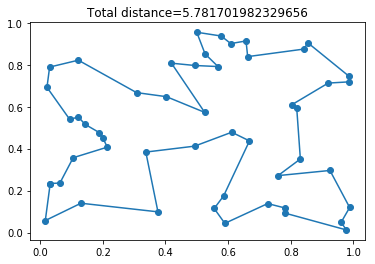

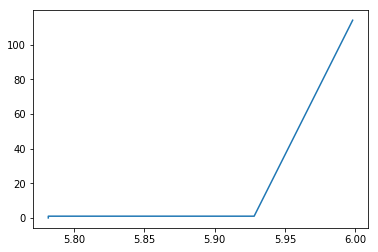

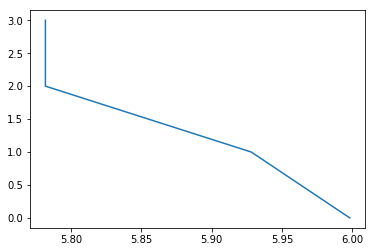

In [7]:
#!/usr/bin/env python
steplist = []
distlist = []
totalsteplist = []
""" Traveling salesman problem solved using Simulated Annealing.
http://www.physics.rutgers.edu/~haule/681/src_MC/python_codes/salesman.py
"""
from scipy import *
from pylab import *

def Distance(R1, R2):
    return sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
    dist=0
    for i in range(len(city)-1):
        dist += Distance(R[city[i]],R[city[i+1]])
    dist += Distance(R[city[-1]],R[city[0]])
    return dist
    
def reverse(city, n):
    nct = len(city)
    nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
    # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
    # Start at the ends of the segment and swap pairs of cities, moving towards the center.
    for j in range(nn):
        k = (n[0]+j) % nct
        l = (n[1]-j) % nct
        (city[k],city[l]) = (city[l],city[k])  # swap
    
def transpt(city, n):
    nct = len(city)
    
    newcity=[]
    # Segment in the range n[0]...n[1]
    for j in range( (n[1]-n[0])%nct + 1):
        newcity.append(city[ (j+n[0])%nct ])
    # is followed by segment n[5]...n[2]
    for j in range( (n[2]-n[5])%nct + 1):
        newcity.append(city[ (j+n[5])%nct ])
    # is followed by segment n[3]...n[4]
    for j in range( (n[4]-n[3])%nct + 1):
        newcity.append(city[ (j+n[3])%nct ])
    return newcity

def Plot(city, R, dist):
    # Plot
    Pt = [R[city[i]] for i in range(len(city))]
    Pt += [R[city[0]]]
    Pt = array(Pt)
    title('Total distance='+str(dist))
    plot(Pt[:,0], Pt[:,1], '-o')
    show()

if __name__=='__main__':

    ncity = 50 #ηταν 100 πριν       # Number of cities to visit
    maxTsteps = 100    # Temperature is lowered not more than maxTsteps
    Tstart = 0.2       # Starting temperature - has to be high enough
    fCool = 0.9        # Factor to multiply temperature at each cooling step
    maxSteps = 100*ncity     # Number of steps at constant temperature
    maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

    Preverse = 0.5      # How often to choose reverse/transpose trial move

    # Choosing city coordinates
    R=[]  # coordinates of cities are choosen randomly
    for i in range(ncity):
        R.append( [rand(),rand()] )
    R = array(R)

    # The index table -- the order the cities are visited.
    city = range(ncity)
    # Distance of the travel at the beginning
    dist = TotalDistance(city, R)

    # Stores points of a move
    n = zeros(6, dtype=int)
    nct = len(R) # number of cities
    
    T = Tstart # temperature

    Plot(city, R, dist)
    
    for t in range(maxTsteps):  # Over temperature

        accepted = 0
        for i in range(maxSteps): # At each temperature, many Monte Carlo steps
            
            while True: # Will find two random cities sufficiently close by
                # Two cities n[0] and n[1] are choosen at random
                n[0] = int((nct)*rand())     # select one city
                n[1] = int((nct-1)*rand())   # select another city, but not the same
                if (n[1] >= n[0]): n[1] += 1   #
                if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
                nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
                if nn>=3: break
        
            # We want to have one index before and one after the two cities
            # The order hence is [n2,n0,n1,n3]
            n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
            n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes
            
            if Preverse > rand(): 
                # Here we reverse a segment
                # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
                de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])
                
                if de<0:
                    accepted += 1
                    dist += de
                    reverse(city, n)
            else:
                # Here we transpose a segment
                nc = (n[1]+1+ int(rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
                n[4] = nc
                n[5] = (nc+1) % nct
        
                # Cost to transpose a segment
                de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
                de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])
                
                if de<0:
                    accepted += 1
                    dist += de
                    city = transpt(city, n)
                    
            if accepted > maxAccepted: break

        # Plot
        Plot(city, R, dist)
        distlist.append(dist)
        steplist.append(accepted)    
        print("T=%10.5f , distance= %10.5f , accepted steps= %d" %(T, dist, accepted))
        totalsteplist.append(t)
        T *= fCool             # The system is cooled down
        if accepted == 0: break  # If the path does not want to change any more, we can stop

        
    Plot(city, R, dist)
plot(distlist,steplist)
show()
plot(distlist,totalsteplist)
show()

<h3><b><i>Ερωτήσεις</i></b></h3>

<lu>
<li>Να διατυπώσετε το πρόβλημα <i>TSP</i>.</li>
    
    Το πρόβλημα του μετακινούμενου πωλητή (που ονομάζεται επίσης και πρόβλημα πλανόδιου πωλητή ή TSP) θέτει την ακόλουθη ερώτηση: "Λαμβάνοντας υπόψη μια λίστα με τις πόλεις και τις αποστάσεις μεταξύ κάθε ζεύγους πόλεων, ποια είναι η συντομότερη διαδρομή που επισκέπτεται κάθε πόλη και επιστρέφει την πόλη προέλευσης; " 
<br>

<li>Βασική Περιγραφή Τρόπου λειτουργίας του προγράμματος, πριν αναφέρουμε πως διαφοροποιείται για Hill Climbing και Simulated Annealing.</li>

    Αρχικά έχουμε μια τυχαία επιλογή σύνδεσης πόλεων.
    
    Σε κάθε μείωση της θερμοκρασίας, ένας αριθμός τυχάιων transformation στο μονοπάτι πραγματοποιείται. Αρχικά, ένα segment του path επιλέγεται 2 πόλεις που ορίζονται ως Αρχή και Τέλος και τις ενδιάμεσες τους. Το πρόγραμμα μας επίσης ορίζει κατά 0.5%  2 κινήσεις:
    
            Τransport : Το segment που επιλέχθηκε τυχαία με Αρχή και Τέλος κόβεται από το σημείο που βρίσκεται και μεταφέρεται αλλού στο path.
            
            
            Reverse   : Δημιουργία ενός νέου path, στο οποίο οι πόλεις του segment που διαλέξαμε γίνονται reversed ως προς τη σειρά επίσκεψης.


    Μετά από αυτές τις κινήσεις το μήκος του modified path υπολογίζεται και αν η διαφορά κόστους μεταξύ του παλιού path και του καινούριου είναι αρνητική (de<0), τότε το path αυτό είναι πιο μικρό και επομένως κάνει replace το παλιό , ως μια καλύτερη επιλογή.
    
    Εδώ ουσιαστικά, είναι που αλλάζει και ο αλγόριθμος Simulated Annealing , αφού στον 2ο θα κάνουμε και έναν ακόμα έλεγχο. Αν το cost difference > 0( ή de >0 ) τότε με πιθανότητα exp(-de/T)>rand() (~U[0,1]) κάνουμε replace το παλίο με το νέο path  παρόλο που θεωρείται κακή κίνηση.
    
    
    NOTES:
    
        Total number of changes = 100 * number of cities
        Total number of accepted steps for a constant T = 10 * number of cities

<li>Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Hill Climbing</i> και να εξηγήσετε γιατί μπορεί να οδηγήσει σε κακές λύσεις.</li>

    Η μέθοδος Hill Climbing σε κάθε βήμα της , η προσωρινή λύση αντικαθίσταται με ένα κοντινό γείτονα με καλύτερη λύση. Ωστόσο, οι προσπάθειες του για να βρει την τελική λύση , βλέποντας αν η τωρινή λύση είναι καλύτερη από τις γειτονικές το κάνει επιρρεπή στο να κολλάει σε LOCAL OPTIMA σημεία.

<br>
<li>Να περιγράψετε, σύντομα, τη λειτουργία του αλγορίθμου <i>Simulated Annealing</i> και γιατί είναι δυνατό να οδηγήσει σε καλύτερες λύσεις από τον αλγόριθμο <i>Hill Climbing</i>.</li>

    O Simulated Annealing λειτουργεί ακριβώς όπως ο HIll Climbing με μια διαφορά. Στον 1ο αλγόριθμο επιτρέπεται μια κακή κίνηση ("downhill move"). O λόγος που έχουμε καλύτερες λύσεις είναι γιατί προσπερνάει το πρόβλημα του Hill Climbing που κολλάνε σε local optima με το να κάνει μια κακή κίνηση. Η πιθανότητα να γίνει μια κακή κίνηση ουσιαστικά ελαττώνεται όσο περνάει ο χρόνος. Στην αρχή πιο γρήγορα και μετά μειώνεται ώστε να φτάσει σε πολύ πολύ αργούς ρυθμούς. Ως αποτέλεσμα, στο τέλος θα λειτουργεί σχεδόν σα το Hill Climbing καθώς η θερμοκρασία θα έχει μειωθεί πολύ.

    Στο πρόγραμμα μας, το σημείο του κώδικα που αλλάζει όλη αυτή η λειτουργία είναι το :
    
            if de<0 or exp(-de/T)>rand(). Στο Hill Climbing έχουμε μόνο το de<0 δηλαδή επιτρέπεται η αλλαγή μόνο σε καλύτερες κινήσεις ενώ η ύπαρξη της exp(-de/T)>rand() ενεργοποιεί τη λειτουργία του S.A. επιτρέποντας μια κακή κίνηση με την πιθανότητα που αναφέρθηκε.

<br>
<li>Να εκτελέσετε τα παραπάνω προγράμματα. Να καταγράψετε τις εξόδους τους. Δεν είναι απαραίτητο να κρατήσετε όλα τα διαγράμματα, αλλά μερικά από τα πιο αντιπροσωπευτικά.</li>

     Τα αποτελέσματα των γραφημάτων και των 2 προγραμμάτων βρίσκονται παραπάνω.

<br>
<li>Για τις δύο περιπτώσεις, να κάνετε τις γραφικές παραστάσεις της ελάχιστης συνολικής απόστασης που θα διανύσει ο πωλητής συναρτήσει του συνολικού αριθμού των βημάτων που απαιτούνται. Να σχολιάσετε τις διαφορές των δύο αλγορίθμων ως προς την τιμή της τελικής λύσης και το συνολικό αριθμό των βημάτων που απαιτούνται για να οδηγηθούμε σε αυτήν.</li>

Από τα παρακάτω διαγράμματα παρατηρούμε πως οι λύσεις βρίσκονται πολύ κοντά. Για παράδειγμα ο H.C. έχει total distance 5.54 ενώ ο S.A. έχει 5.24. Δηλαδή βρίσκει καλύτερες λύσεις, αλλά με αρκετά περισσότερες κινήσεις.

Αυτό είναι το διάγραμμα accepted steps - distance για __simulated annealing__.

![title](annealing.png)

Παρακάτω είναι το διάγραμμα για το __hill climbing__.

![title](hill.png)

<br>
<li>Μελετώντας τα διαγράμματα που επιστρέφουν ως έξοδο τα παραπάνω προγράμματα, να σχολιάσετε πόσο απότομες είναι οι μεταβολές ανάμεσα στις λύσεις που επιστρέφουν οι αλγόριθμοι σε κάθε βήμα μέχρι να φτάσουν στην τελική λύση.</li>

    Βλέπουμε πως οι απότομες εναλλαγές στο διάγραμμα του S.A. οφείλονται στην επιλογή μιας κακής κίνησης σε αντίθεση με το Hill Climbing, που έχουμε ομαλή μείωση καθώς επιτρέπονται μόνο καλύτερες κινήσεις.
    
    Προφανώς ο αλγόριθμος S.A. απαιτεί περισσότερα βήματα(500 περίπου) για να συγκίνει καθώς υπάρχουν και οι κακές κινήσεις, ενώ ο H.C. συγκλίνει γρήγορα(από 120 steps) καθώς κοιτάει μια γειτονιά μόνο.

</lu>